# Single-label, multiclass classification using Reuters dataset

In [181]:
import numpy as np
import matplotlib.pyplot as plt

from keras import models
from keras import layers

## Load and explore data

In [138]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [140]:
type(train_labels) == type(np.array(train_labels))

True

In [122]:
# take a look at the data
print(train_data.shape)
print(type(train_data[0]), len(train_data[0]))

print(test_data.shape)

print(train_labels[0:10])

(8982,)
<class 'list'> 87
(2246,)
[ 3  4  3  4  4  4  4  3  3 16]


In [78]:
# encode data and get back original text using 
word_index = reuters.get_word_index()
word_index = {k:(v + 3) for k,v in word_index.items()}

word_index['PADDING'] = 0
word_index['START'] = 1
word_index['UNKNOWN'] = 2

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def reverse_word_index_func(index):
    print(' '.join([reverse_word_index.get(i, '?') for i in train_data[index]]))

for i in range(4):
    reverse_word_index_func(i)
    print("")

START UNKNOWN UNKNOWN said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3

START generale de banque sa lt UNKNOWN br and lt heller overseas corp of chicago have each taken 50 pct stakes in UNKNOWN company sa UNKNOWN factors generale de banque said in a statement it gave no financial details of the transaction sa UNKNOWN UNKNOWN turnover in 1986 was 17 5 billion belgian francs reuter 3

START shr 3 28 dlrs vs 22 cts shr diluted 2 99 dlrs vs 22 cts net 46 0 mln vs 3 328 000 avg shrs 14 0 mln vs 15 2 mln year shr 5 41 dlrs vs 1 56 dlrs shr diluted 4 94 dlrs vs 1 50 dlrs net 78 2 mln vs 25 9 mln avg shrs 14 5 mln vs 15 1 mln note earnings per share reflect the two

## Prepare data by vectorizing the word integers

In [79]:
def vectorize_words(sequences, dimension=10000):
    
    results = np.zeros((len(sequences), dimension))
    
    for i, sequence in enumerate(sequences):
        
        # sequence is a list which we use to 
        # access a subset of the array results
        # at row i
        results[i, sequence] = 1.

    return results

x_train = vectorize_words(train_data)
x_test = vectorize_words(test_data)

In [80]:
# one hot encode (vectorize) training and test labels
one_hot_train_labels = vectorize_words(train_labels, dimension=46)
one_hot_test_labels = vectorize_words(test_labels, dimension=46)

In [141]:
one_hot_test_labels.shape

(2246, 46)

## Validation set

In [81]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

## Build and train neural network

In [82]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [85]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 178us/step - loss: 2.5322 - acc: 0.4955 - val_loss: 1.7208 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 108us/step - loss: 1.4452 - acc: 0.6879 - val_loss: 1.3459 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 1s 116us/step - loss: 1.0953 - acc: 0.7651 - val_loss: 1.1708 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 113us/step - loss: 0.8697 - acc: 0.8165 - val_loss: 1.0793 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 1s 109us/step - loss: 0.7034 - acc: 0.8472 - val_loss: 0.9844 - val_acc: 0.7810
Epoch 6/20
7982/7982 [==============================] - 1s 109us/step - loss: 0.5667 - acc: 0.8802 - val_loss: 0.9411 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 1s 105us/step - loss: 0.4581 - acc: 0.9048 - val_loss: 0.9083 - val_acc: 0.8020


In [ ]:
history_dict = history.history
history_dict

In [92]:
# plot trainng and validation loss

def loss_curve(history_dict):
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']

    epochs = range(1, len(history_dict['acc']) + 1)

    plt.plot(epochs, loss_values, 'bo', label='Training Loss')
    plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

def accuracy_curve(history_dict):
    acc_values = history_dict['acc']
    val_acc_values = history_dict['val_acc']

    epochs = range(1, len(history_dict['acc']) + 1)

    plt.plot(epochs, acc_values, 'bo', label='Training Accuracy')
    plt.plot(epochs, val_acc_values, 'b', label='Validation Accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

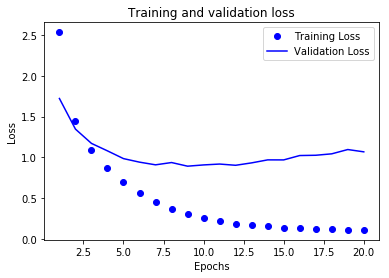

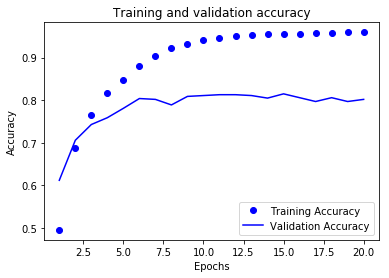

In [94]:
loss_curve(history_dict)
accuracy_curve(history_dict)

Overfitting appears to occur at around the 9th epoch. Build another neural network from scratch and train it for only 9 epochs.

Note that we must build a new neural network from scratch because calling the fit method again on the model above will continue the training from where left off (e.g. calling fit again for 9 epochs will result a trained neural network trained for a total of 29 epochs).

In [116]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=9,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 155us/step - loss: 2.4505 - acc: 0.5236 - val_loss: 1.6310 - val_acc: 0.6360
Epoch 2/9
7982/7982 [==============================] - 1s 106us/step - loss: 1.3597 - acc: 0.7095 - val_loss: 1.2775 - val_acc: 0.7200
Epoch 3/9
7982/7982 [==============================] - 1s 106us/step - loss: 1.0269 - acc: 0.7791 - val_loss: 1.1122 - val_acc: 0.7540
Epoch 4/9
7982/7982 [==============================] - 1s 107us/step - loss: 0.8179 - acc: 0.8265 - val_loss: 1.0274 - val_acc: 0.7790
Epoch 5/9
7982/7982 [==============================] - 1s 105us/step - loss: 0.6514 - acc: 0.8637 - val_loss: 0.9694 - val_acc: 0.7790
Epoch 6/9
7982/7982 [==============================] - 1s 106us/step - loss: 0.5209 - acc: 0.8909 - val_loss: 0.9315 - val_acc: 0.8030
Epoch 7/9
7982/7982 [==============================] - 1s 109us/step - loss: 0.4183 - acc: 0.9123 - val_loss: 0.9137 - val_acc: 0.8060
Epoch 8

In [117]:
results = model.evaluate(x_test, one_hot_test_labels)
results

2246/2246 [==============================] - 0s 102us/step


[1.0138686293485646, 0.7827248441939468]

## Make predictions

In [130]:
predictions = model.predict(x_test)
print("Topic predicted: {} | Probability of prediciton: {}".format(np.argmax(predictions[0]), max(predictions[0])))

Topic predicted: 4 | Probability of prediciton: 0.48005539178848267


## Information bottlenecks

In [182]:
def nn_architecture(num_layers, num_act_units):
    """
    Custom neural network architecture for the reuters dataset
    
    num_layers: int
    num_act_units: list
    """
    
    assert num_layers == len(num_act_units), "num_layers must equal length of num_act_units list"
    
    custom_model = models.Sequential()

    # first hidden layer (input are the one hot encoded top 10,000 words)
    custom_model.add(layers.Dense(num_act_units[0], activation='relu', input_shape=(10000,)))
    
    # remaining num_layers - 1 hidden layers
    for l in range(num_layers - 1):
        custom_model.add(layers.Dense(num_act_units[l + 1], activation='relu'))
    
    # final layers (46 possible classes)
    custom_model.add(layers.Dense(46, activation='softmax'))

    custom_model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    print(custom_model.summary())
    
    return custom_model

def nn_fit(x_train, y_train, x_val, y_val, model, num_epochs, batch_size):
    """
    Fit model using training data and validate
    Returns the history of the training session
    """
    
    history = model.fit(x_train,
                        y_train,
                        epochs=num_epochs,
                        batch_size=batch_size,
                        validation_data=(x_val, y_val),
                        verbose=1)
    
    return history

In [ ]:
model1 = nn_architecture(2, [64, 64])
model2 = nn_architecture(3, [64, 64, 64])
model3 = nn_architecture(2, [64, 32])
model4 = nn_architecture(2, [64, 2])

In [184]:
my_models = [model1, model2, model3, model4]

for m in my_models:

    nn_fit(partial_x_train, 
       partial_y_train, 
       x_val, 
       y_val, 
       model=m, 
       num_epochs=9, 
       batch_size=512)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_133 (Dense)            (None, 64)                640064    
_________________________________________________________________
dense_134 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_135 (Dense)            (None, 46)                2990      
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________
None
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_136 (Dense)            (None, 64)                640064    
_________________________________________________________________
dense_137 (Dense)            (None, 64)                4160      
_________________________________________________________________

Epoch 9/9
7982/7982 [==============================] - 1s 106us/step - loss: 2.4113 - acc: 0.5215 - val_loss: 2.4896 - val_acc: 0.5020


# Notes

In [83]:
# you can access a subset of a numpy array using a list of indices

a = np.array([[3,5,5],[6,1,0]])
print(a[0,[1]])
print(a[0,[1,2]])
print(a[1, [0,1,2]])

[5]
[5 5]
[6 1 0]
